<a href="https://colab.research.google.com/github/mmostafahareb/credential_finder/blob/main/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports:

In [1]:
import os
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import joblib

Data Extracting and Labeling

In [2]:
zip_path = "projects.zip"
extract_dir = "Projects"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")


clean_dir = os.path.join(extract_dir, 'Clean')
dirty_dir = os.path.join(extract_dir, 'Dirty')

file_paths = []
labels = []

# Get all file paths and labels for clean files
for filename in os.listdir(clean_dir):
    file_paths.append(os.path.join(clean_dir, filename))
    labels.append('clean')

# Get all file paths and labels for dirty files
for filename in os.listdir(dirty_dir):
    file_paths.append(os.path.join(dirty_dir, filename))
    labels.append('dirty')

# Now you have a list of file paths and corresponding labels
print(file_paths)
print(labels)

['Projects/Clean/main2.js', 'Projects/Clean/detect_make.py', 'Projects/Clean/Styled.tsx', 'Projects/Clean/index-1 (3).js', 'Projects/Clean/views.py', 'Projects/Clean/insertion_sort.py', 'Projects/Clean/acronym_generator.py', 'Projects/Clean/ClientHandler.java', 'Projects/Clean/Text_layout.js', 'Projects/Clean/Templatable.js', 'Projects/Clean/parse_pom.js', 'Projects/Clean/TaskRunner.js', 'Projects/Clean/indexing.py', 'Projects/Clean/euclid_gcd.py', 'Projects/Clean/SimilarityVSM.py', 'Projects/Clean/audio.py', 'Projects/Clean/Tablet.js', 'Projects/Clean/ToolbarDroppable.js', 'Projects/Clean/gui (2).py', 'Projects/Clean/InvertBinaryTree.java', 'Projects/Clean/stream.py', 'Projects/Clean/processing.py', 'Projects/Clean/admin.js', 'Projects/Clean/BinarySearch.java', 'Projects/Clean/TextArea_layout.js', 'Projects/Clean/test.py', 'Projects/Clean/products.js', 'Projects/Clean/mergeIntervals.js', 'Projects/Clean/AStarAlgorithm.java', 'Projects/Clean/HighestPowerOf2.java', 'Projects/Clean/array

Data Preprocessing:

In [3]:
file_contents = []
for file_path in file_paths:
    with open(file_path, 'r',errors='ignore') as file:
        file_contents.append(file.read())

X_train, X_test, y_train, y_test = train_test_split(file_contents, labels, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train).toarray()
X_test_vectorized = vectorizer.transform(X_test).toarray()
print(X_train_vectorized.shape)
print(X_test_vectorized.shape)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


(364, 14508)
(92, 14508)




LTSM Model Building:



In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Create the Logistic Regression model
model = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Add more C values as needed
    'penalty': ['l1', 'l2']  # Add more penalty options as needed
}

# Create the KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train_vectorized, y_train_encoded)




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

Model Evaluation and Saving:


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        66
           1       0.96      0.96      0.96        26

    accuracy                           0.98        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92

Confusion Matrix:
[[65  1]
 [ 1 25]]


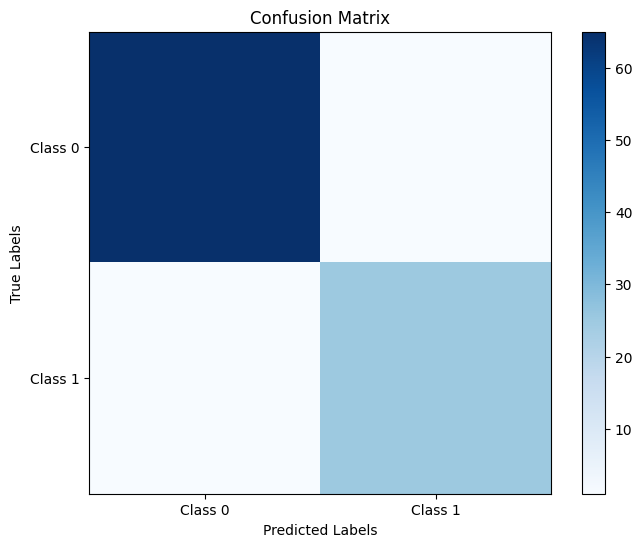

Saved model to disk


In [5]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train the best model
best_model.fit(X_train_vectorized, y_train_encoded)

# Make predictions on the test set
y_pred = best_model.predict(X_test_vectorized)

# Generate classification report and confusion matrix
report = classification_report(y_test_encoded, y_pred)
confusion = confusion_matrix(y_test_encoded, y_pred)

# Print the classification report and confusion matrix
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(2), ['Class 0', 'Class 1'])
plt.yticks(np.arange(2), ['Class 0', 'Class 1'])
plt.colorbar()
plt.show()

# Export the trained model
import joblib
joblib.dump(best_model, "logistic_regression_model.pkl")
print("Saved model to disk")